### K Means Clustering

In [11]:
from logging import warning
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [12]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
X.shape

(1000, 2)

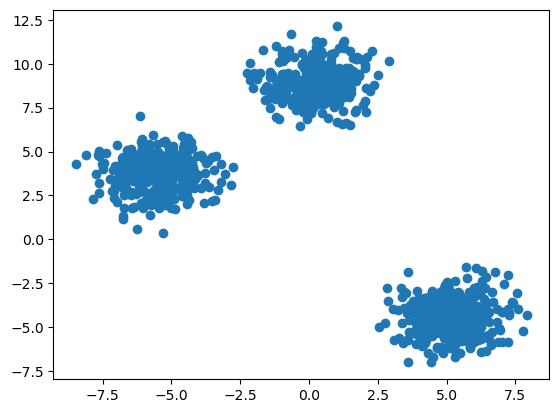

In [13]:
plt.scatter(X[:,0], X[:,1])

<Axes: >

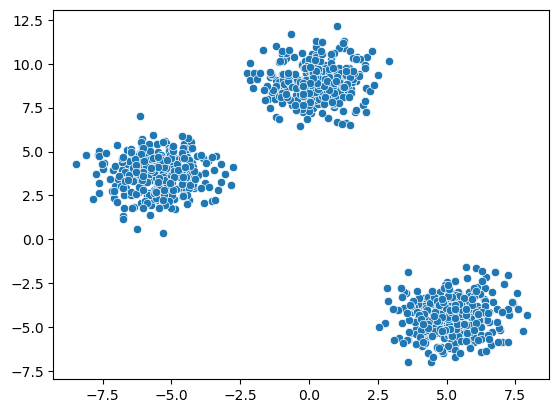

In [14]:
sns.scatterplot(x=X[:,0], y=X[:,1])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

In [16]:
from sklearn.cluster import KMeans

#### Manually
- Elbow Method to select the K value

In [17]:
WCSS = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)

WCSS

c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 991.8899785187884,
 853.4944703359785,
 755.172020342185,
 666.6507824252202,
 578.106874423535,
 534.1411043178493]

<Axes: >

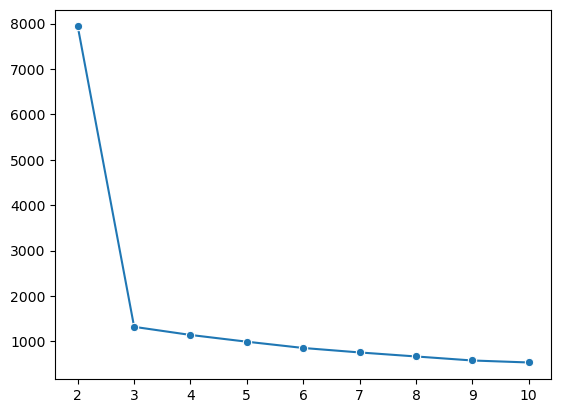

In [18]:
sns.lineplot(x=range(2, 11), y=WCSS, marker="o")

In [19]:
kmeans = KMeans(n_clusters=3, init="k-means++")
y_labels = kmeans.fit_predict(X_train)

c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<Axes: >

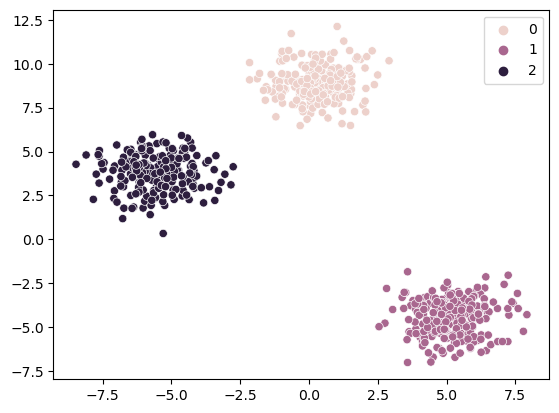

In [20]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_labels)

In [21]:
y_test_labels = kmeans.predict(X_test)

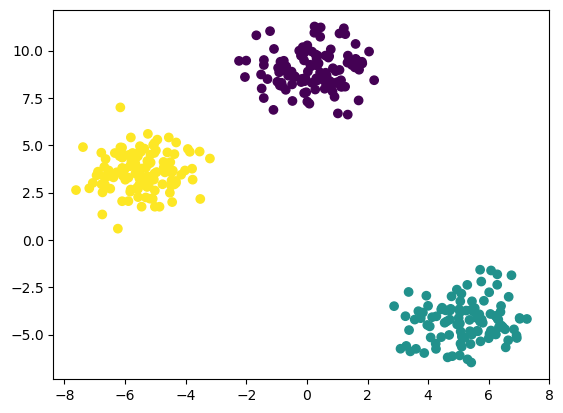

In [22]:
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test_labels)

In [23]:
! pip install kneed

In [26]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 11), WCSS, curve="convex", direction="decreasing")
kl.elbow

3

In [27]:
## Performance Evaluation
from sklearn.metrics import silhouette_score
silhouette_score(X_train, y_labels)

0.8071181203797672

In [28]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [29]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33886792524096065,
 0.3456934811504727,
 0.3399291568562565,
 0.34349332899418716,
 0.34253693964741355]

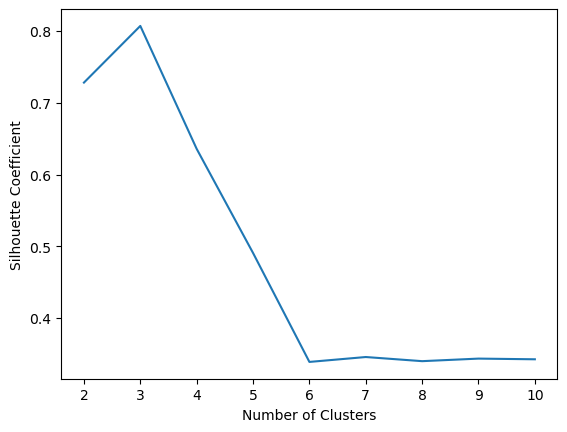

In [30]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()